In [54]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
df=pd.read_csv('soft5.csv');
from scipy.special import boxcox, inv_boxcox

df.head(10)

,Time,Fault
0,0,0
1,1,2
2,2,0
3,3,2
4,4,3
5,5,3
6,6,6
7,7,8
8,8,8
9,9,12


In [55]:
length=len(df['Fault'])
sum=0;
for i in range(1,length):
    sum= sum+df['Fault'][i]
    df['Fault'][i]=sum
    #print(sum)

df.head(10)

,Time,Fault
0,0,0
1,1,2
2,2,2
3,3,4
4,4,7
5,5,10
6,6,16
7,7,24
8,8,32
9,9,44


In [56]:
##Data Transformation when Lemda=zero
df['Fault1']=df['Fault']
df.Fault1=df.Fault1.astype(float)
df.head(10)
    

,Time,Fault,Fault1
0,0,0,0.0
1,1,2,2.0
2,2,2,2.0
3,3,4,4.0
4,4,7,7.0
5,5,10,10.0
6,6,16,16.0
7,7,24,24.0
8,8,32,32.0
9,9,44,44.0


In [57]:
length= len(df['Fault1'])
lemda = 1
for i in range(1,length):
    df['Fault1'][i] = boxcox(df['Fault1'][i] , lemda)
    

df.head(10)

<ipython-input-57-dd8585dfeca0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fault1'][i] = boxcox(df['Fault1'][i] , lemda)


,Time,Fault,Fault1
0,0,0,0.0
1,1,2,1.0
2,2,2,1.0
3,3,4,3.0
4,4,7,6.0
5,5,10,9.0
6,6,16,15.0
7,7,24,23.0
8,8,32,31.0
9,9,44,43.0


In [58]:
class LinarRegression:
    def __init__ (self,TempDataInput, TempDataFaults):
        self.TempDataInput=TempDataInput
        self.TempDataFaults=TempDataFaults
        self.predictResult=[]
        self.nextresult=[]

        
    def calculation(self):
        self.mean_x=np.mean(self.TempDataInput)
        self.mean_y=np.mean(self.TempDataFaults)
        print("MeanX and MeanY",self.mean_x,self.mean_y)
        
        self.numer=0.0
        self.dnum=0.0
        
        for i in range(len(self.TempDataInput)):
            self.numer+=(self.TempDataInput[i]-self.mean_x)*(self.TempDataFaults[i]-self.mean_y)
            self.dnum+=(self.TempDataInput[i]-self.mean_x)*(self.TempDataInput[i]-self.mean_x)
            
        self.cof_= self.numer/self.dnum
        self.intercept_=self.mean_y -(self.mean_x*self.cof_)
        
        print(f"Coefficiant {self.cof_}  and intercept {self.intercept_}")
        
        for i in self.TempDataInput:
            self.predictResult.append((i*self.cof_ +self.intercept_))
    
    def predict(self,val):
        return val*self.cof_+self.intercept_
            
            
    def DrawGraph(self):
        plt.xlabel='Year'
        plt.ylabel='Fault'
        #plt.scatter(df.Year,df.percent,color='RED', marker='+')
        plt.plot(self.TempDataInput,self.TempDataFaults,color='blue',marker='+')
        plt.plot(self.TempDataInput,self.predictResult,color='RED',marker='+')
        
    def NextPrediction(self, start, end, dist):
        ##PredictNext5data Analysis
        self.totalError=0.0;
        for i in range(start,end):
            self.temp= (i*self.cof_ +self.intercept_)
            self.nextresult.append(self.temp);
            
        self.nextresult = inv_boxcox(self.nextresult , lemda)
        
        
        for i in range(start,end):
            self.totalError+=abs(self.nextresult[i-start]-df['Fault'][i])
            print(i," act=",df['Fault'][i], "predict",self.nextresult[i-start],"RE", (abs((self.nextresult[i-start]-df['Fault'][i])))/(df['Fault'][i]))
        print("** The average Value ",self.totalError/dist )
        
        plt.xlabel='Year'
        plt.ylabel='Fault'
        #plt.scatter(df.Year,df.percent,color='RED', marker='+')
        
        
        templist=[]
        templist2=[]
        for i in range(start,end):
            templist.append(i);
            templist2.append(df['Fault'][i])
        #plt.plot(templist,templist2,color='blue',marker='+')
        #plt.plot(templist, self.revers,color='RED',marker='+')
            
                                                       
    


MeanX and MeanY 5.5 18.5
Coefficiant 5.8121212121212125  and intercept -13.466666666666669
11  act= 60 predict 51.466666666666676 RE 0.14222222222222208
12  act= 65 predict 57.27878787878787 RE 0.11878787878787897
13  act= 69 predict 63.09090909090909 RE 0.0856389986824769
14  act= 75 predict 68.90303030303029 RE 0.08129292929292944
15  act= 85 predict 74.71515151515153 RE 0.1209982174688055
** The average Value  7.709090909090908


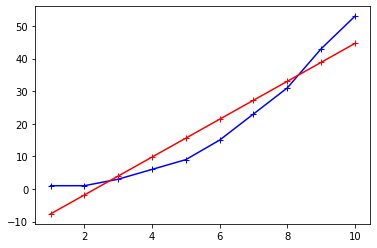

In [59]:
#################################### 10X5 ##############################
First_TenDataInput=[];
First_TenDataFults=[];
for i in range(1,11):
    First_TenDataInput.append(i)
    First_TenDataFults.append(df['Fault1'][i])

l1=LinarRegression(First_TenDataInput,First_TenDataFults);    
l1.calculation()
l1.DrawGraph()
l1.NextPrediction(11,16,5)
del l1

MeanX and MeanY 10.5 53.4
Coefficiant 6.88421052631579  and intercept -18.88421052631579
21  act= 126 predict 126.68421052631581 RE 0.00543024227234769
22  act= 129 predict 133.56842105263158 RE 0.035414116687066496
23  act= 131 predict 140.4526315789474 RE 0.07215749296906415
24  act= 134 predict 147.3368421052632 RE 0.09952867242733733
25  act= 142 predict 154.22105263157894 RE 0.08606375092661227
26  act= 148 predict 161.10526315789468 RE 0.08854907539118029
27  act= 155 predict 167.9894736842105 RE 0.08380305602716458
28  act= 163 predict 174.87368421052628 RE 0.07284468840813668
29  act= 165 predict 181.75789473684216 RE 0.10156299840510401
30  act= 168 predict 188.6421052631579 RE 0.1228696741854637
** The average Value  11.563157894736847


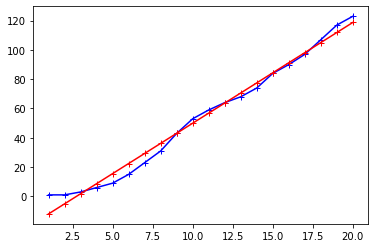

In [60]:
#################################### 20X10 ##############################
First_20DataInput=[];
First_20DataFults=[];
for i in range(1,21):
    First_20DataInput.append(i)
    First_20DataFults.append(df['Fault1'][i])

l2=LinarRegression(First_20DataInput,First_20DataFults);    
l2.calculation()
l2.DrawGraph()
l2.NextPrediction(21,31,10)
del l2

MeanX and MeanY 15.5 83.96666666666667
Coefficiant 6.308120133481645  and intercept -13.809195402298826
31  act= 172 predict 182.74252873563213 RE 0.062456562416465904
32  act= 175 predict 189.05064886911381 RE 0.0802894221092218
33  act= 178 predict 195.35876900259552 RE 0.09752117417188495
34  act= 182 predict 201.66688913607715 RE 0.10805983041800629
35  act= 186 predict 207.97500926955865 RE 0.11814521112665943
36  act= 191 predict 214.28312940304042 RE 0.12190120106303884
37  act= 195 predict 220.59124953652199 RE 0.13123717711036917
38  act= 199 predict 226.89936967000378 RE 0.14019783753770743
39  act= 204 predict 233.2074898034854 RE 0.14317396962492843
40  act= 205 predict 239.5156099369669 RE 0.1683688289608142
** The average Value  22.429069336299577


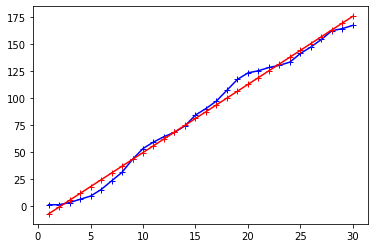

In [61]:
#################################### 30X10 ##############################
First_30DataInput=[];
First_30DataFults=[];
for i in range(1,31):
    First_30DataInput.append(i)
    First_30DataFults.append(df['Fault1'][i])

l3=LinarRegression(First_30DataInput,First_30DataFults);    
l3.calculation()
l3.DrawGraph()
l3.NextPrediction(31,41,10)
del l3

MeanX and MeanY 20.5 109.9
Coefficiant 5.640150093808631  and intercept -5.723076923076931
41  act= 209 predict 226.52307692307687 RE 0.08384247331615728
42  act= 217 predict 232.16322701688546 RE 0.06987662219762884
43  act= 220 predict 237.80337711069413 RE 0.08092444141224604
44  act= 222 predict 243.4435272045028 RE 0.09659246488514775
45  act= 228 predict 249.08367729831144 RE 0.09247226885224318
46  act= 241 predict 254.72382739212006 RE 0.05694534187601683
47  act= 250 predict 260.3639774859288 RE 0.04145590994371514
48  act= 256 predict 266.0041275797374 RE 0.03907862335834933
49  act= 263 predict 271.64427767354596 RE 0.032867975945041664
50  act= 266 predict 277.2844277673547 RE 0.042422660779529
51  act= 269 predict 282.9245778611633 RE 0.051764229967149814
52  act= 273 predict 288.564727954972 RE 0.05701365551271795
53  act= 278 predict 294.20487804878053 RE 0.05829092823302349
54  act= 284 predict 299.8450281425893 RE 0.055792352614751003
55  act= 290 predict 305.485178236

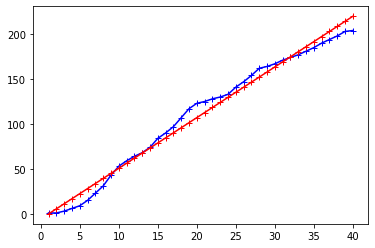

In [62]:
#################################### 40X15 ##############################
First_40DataInput=[];
First_40DataFults=[];
for i in range(1,41):
    First_40DataInput.append(i)
    First_40DataFults.append(df['Fault1'][i])

l4=LinarRegression(First_40DataInput,First_40DataFults);    
l4.calculation()
l4.DrawGraph()
l4.NextPrediction(41,56,15)
del l4